## Job Change Analysis

Goal:predict the likelihood of a candidate seeking a new job or working for the company, as well as interpreting the influencing factors on the employee decision.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [71]:
df=pd.read_csv("aug_train.csv")

In [72]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [73]:
df.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [74]:
df.drop(["enrollee_id","city"],axis=1,inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  14650 non-null  object 
 2   relevent_experience     19158 non-null  object 
 3   enrolled_university     18772 non-null  object 
 4   education_level         18698 non-null  object 
 5   major_discipline        16345 non-null  object 
 6   experience              19093 non-null  object 
 7   company_size            13220 non-null  object 
 8   company_type            13018 non-null  object 
 9   last_new_job            18735 non-null  object 
 10  training_hours          19158 non-null  int64  
 11  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.8+ MB


In [76]:
df.isnull().sum()

city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

<AxesSubplot:xlabel='experience'>

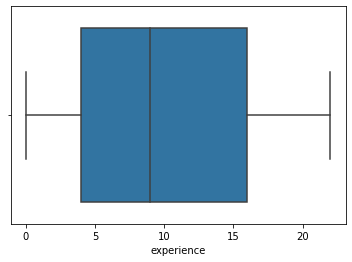

In [77]:
df["experience"].replace({np.NaN:0,">20":22,"<1":0},inplace=True)
df["experience"]=df["experience"].astype(float)
sns.boxplot(df.experience)

<AxesSubplot:xlabel='last_new_job'>

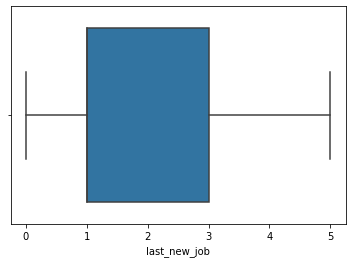

In [78]:
df["last_new_job"].replace({np.NaN:0,">4":5,"never":0},inplace=True)
df["last_new_job"]=df["last_new_job"].astype(float)
sns.boxplot(df.last_new_job)

<AxesSubplot:xlabel='city_development_index'>

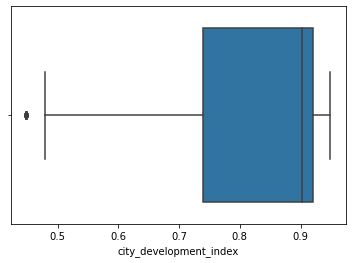

In [79]:
sns.boxplot(df["city_development_index"])

<AxesSubplot:>

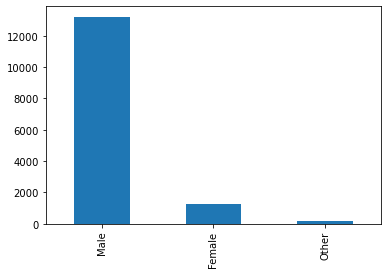

In [80]:
df.gender.value_counts().plot.bar()

<AxesSubplot:>

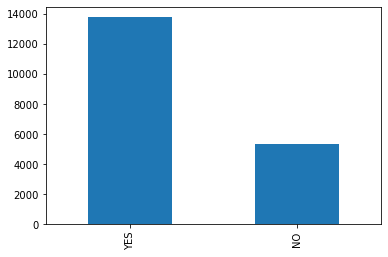

In [81]:
df["relevent_experience"].replace({"Has relevent experience":"YES","No relevent experience":"NO"},inplace=True)
df["relevent_experience"].value_counts().plot.bar()

In [82]:
def company_size_normal(x):
    if x == "<10":
        return "LOCAL"
    elif x == "50-99" or x == "10/49":
        return "SMALL"
    elif x == "100-500":
        return "MEDIUM_SCALE"
    elif x == "500-999":
        return "UPPER_SCALE"
    elif x == "1000-4999" or x == "5000-9999":
        return "EXTENDED"
    elif x == "10000+":
        return "LARGE_SCALE"

In [83]:
def last_new_job_normal(x):
    if x == 0:
        return "NEVER"
    elif 0 < x <= 2:
        return "LITTLE_TIME"
    elif x > 2:
        return "WAITING_TOO_MUCH"
    else:
        pass

In [84]:
def experience_normal(x):  
    if x == 0:
        return 0
    elif 0 < x <= 3:
        return "JUNIOR"
    elif 3 < x <= 7:
        return "MIDDLE_EXPERIENCE"
    elif 7 < x <= 15:
        return "SENIOR"
    elif x > 15:
        return "DOMINATE_BUSINESS"

In [85]:
def city_index_normal(x):
    if x > 0:
        return "%.2f" % x

In [86]:
df["company_size"] = df["company_size"].apply(lambda x: company_size_normal(x))
df["experience"] = df["experience"].apply(lambda x: experience_normal(x))
df["last_new_job"] = df["last_new_job"].apply(lambda x: last_new_job_normal(x))
df["city_development_index"] = df["city_development_index"].apply(lambda x: city_index_normal(x))

In [87]:
df["city_development_index"] = df["city_development_index"].astype(float)

In [88]:
df["gender"].fillna(df["gender"].mode()[0],inplace=True)

In [89]:
df["enrolled_university"].fillna(df["enrolled_university"].mode()[0],inplace=True)

In [90]:
df["education_level"].fillna(df["education_level"].mode()[0],inplace=True)

In [91]:
df["major_discipline"].fillna(df["major_discipline"].mode()[0],inplace=True)

In [92]:
df["experience"].fillna(df["experience"].mode()[0],inplace=True)

In [93]:
df["company_type"].fillna(df["company_type"].mode()[0],inplace=True)

In [94]:
df["company_size"].fillna(df["company_size"].mode()[0],inplace=True)

In [97]:
df.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [100]:
df.sample(5)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
4030,0.90,Male,YES,no_enrollment,Masters,STEM,DOMINATE_BUSINESS,LOCAL,Pvt Ltd,LITTLE_TIME,129,0.0
6086,0.91,Male,YES,no_enrollment,Graduate,STEM,DOMINATE_BUSINESS,EXTENDED,Pvt Ltd,LITTLE_TIME,44,0.0
12478,0.62,Male,YES,no_enrollment,Masters,STEM,MIDDLE_EXPERIENCE,SMALL,Pvt Ltd,NEVER,54,1.0
13501,0.91,Male,NO,no_enrollment,Graduate,STEM,MIDDLE_EXPERIENCE,UPPER_SCALE,Pvt Ltd,LITTLE_TIME,58,0.0
16426,0.92,Male,YES,no_enrollment,Graduate,STEM,MIDDLE_EXPERIENCE,LOCAL,Pvt Ltd,LITTLE_TIME,78,0.0


In [103]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [106]:
def classification_funct(dataset,column_to_be_studied):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.model_selection import train_test_split
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    dataset=dataset[dataset[column_to_be_studied].notnull()]
    x,y=dataset.drop(column_to_be_studied,axis=1),dataset[[column_to_be_studied]]    
    x=pd.get_dummies(x,drop_first=True)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
      
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [107]:
classification_funct(df,"target")

[00:13:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,f1_score,recall_score,precision_score,accuracy_score
XGBClassifier,0.473209,0.412815,0.554302,0.771660
LogisticRegression,0.360373,0.263655,0.569161,0.767484
SVC,0.000000,0.000000,0.000000,0.751566
RandomForestClassifier,0.422871,0.372899,0.488308,0.747129
BernoulliNB,0.349515,0.302521,0.413793,0.720251
KNeighborsClassifier,0.278146,0.220588,0.376344,0.715553
DecisionTreeClassifier,0.400612,0.412815,0.389109,0.693111
GaussianNB,0.476602,0.636555,0.380893,0.652662


## Deep Learning Uygulanırsa?

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [109]:
model=Sequential()
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [110]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [112]:
x,y=df.drop("target",axis=1),df[["target"]]    
x=pd.get_dummies(x,drop_first=True)

In [116]:
model.fit(x,y,epochs=30,batch_size=50,verbose=1)

Epoch 1/30
384/384 [==============================] - 3s 8ms/step - loss: 0.4722 - accuracy: 0.7771
Epoch 2/30
384/384 [==============================] - 3s 8ms/step - loss: 0.4698 - accuracy: 0.7783
Epoch 3/30
384/384 [==============================] - 3s 8ms/step - loss: 0.4658 - accuracy: 0.7787
Epoch 4/30
384/384 [==============================] - 3s 8ms/step - loss: 0.4632 - accuracy: 0.7800
Epoch 5/30
384/384 [==============================] - 3s 9ms/step - loss: 0.4617 - accuracy: 0.7848
Epoch 6/30
384/384 [==============================] - 3s 9ms/step - loss: 0.4590 - accuracy: 0.7857
Epoch 7/30
384/384 [==============================] - 3s 8ms/step - loss: 0.4579 - accuracy: 0.7829
Epoch 8/30
384/384 [==============================] - 3s 8ms/step - loss: 0.4551 - accuracy: 0.7859
Epoch 9/30
384/384 [==============================] - 4s 9ms/step - loss: 0.4574 - accuracy: 0.7863
Epoch 10/30
384/384 [==============================] - 4s 10ms/step - loss: 0.4547 - accuracy: 0.784

In [117]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               16896     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 805,377
Trainable params: 805,377
Non-trainable params: 0
_________________________________________________________________


In [118]:
scores=model.evaluate(x,y)

599/599 [==============================] - 2s 2ms/step - loss: 0.4379 - accuracy: 0.7887


In [119]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 78.87%
